# Telco Customer Churn Project

In [114]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


## Data Preprocessing

In [115]:
# Define the file path
file_path = r'D:\Data Science data\Teclo\WA_Fn-UseC_-Telco-Customer-Churn.csv'

# Read the CSV data
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
#Check the shape of the data
df.shape

(7043, 21)

In [117]:
# Display the general info about dataframe and check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [118]:
# Convert 'TotalCharges' column to numeric
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
# Show the sum of null values in each column
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [119]:
# Show rows where 'TotalCharges' is NaN
df[np.isnan(df['TotalCharges'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [120]:
# Drop rows with NaN values
df.dropna(inplace = True)

In [121]:
# Check again for null values in the dataset
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
# Convert 'SeniorCitizen' column to 'Yes'/'No' from 1/0
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [123]:
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]

#Converte the predictor variable in a binary numeric variable
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

#Convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [124]:
# Check statistical information of numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


## Data Visualization

<Axes: >

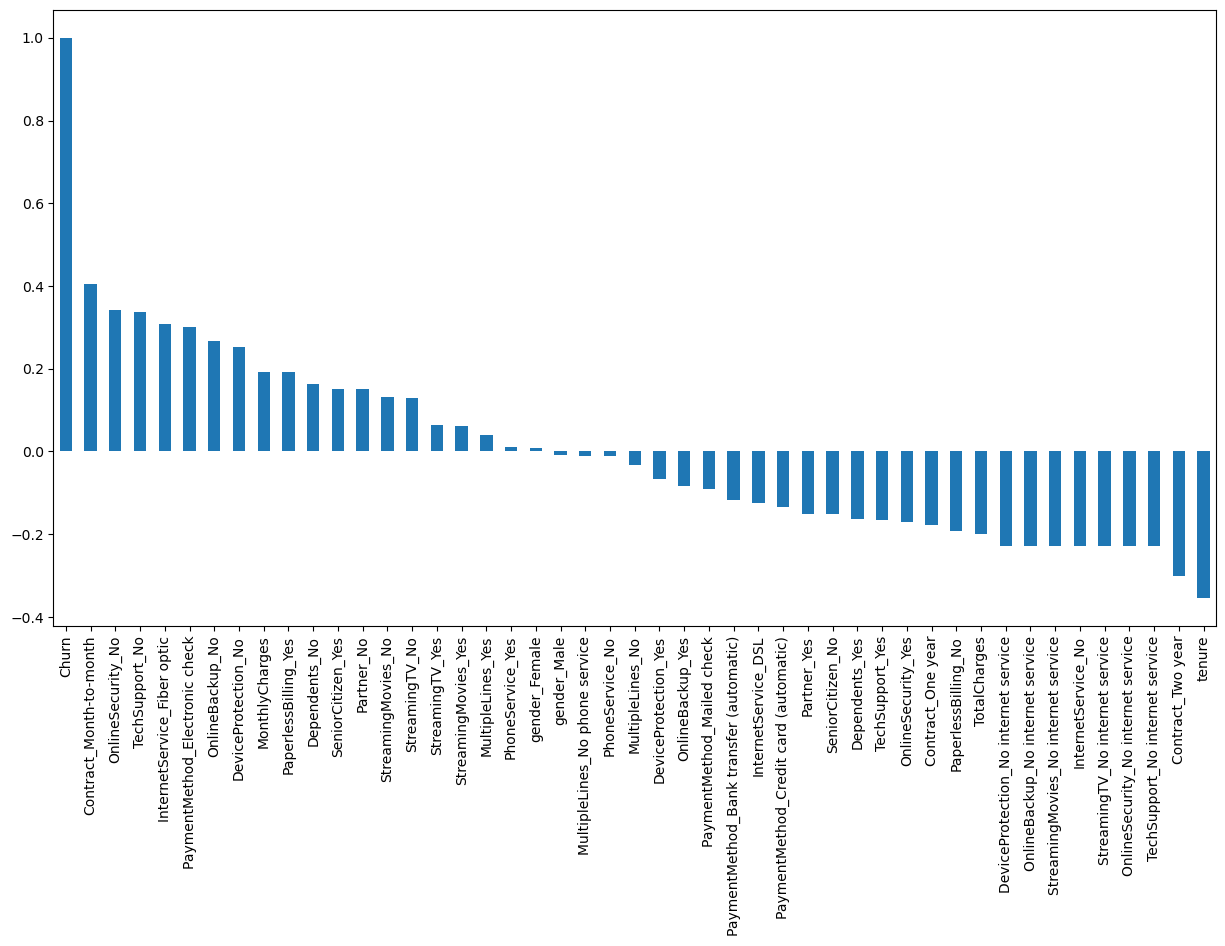

In [125]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

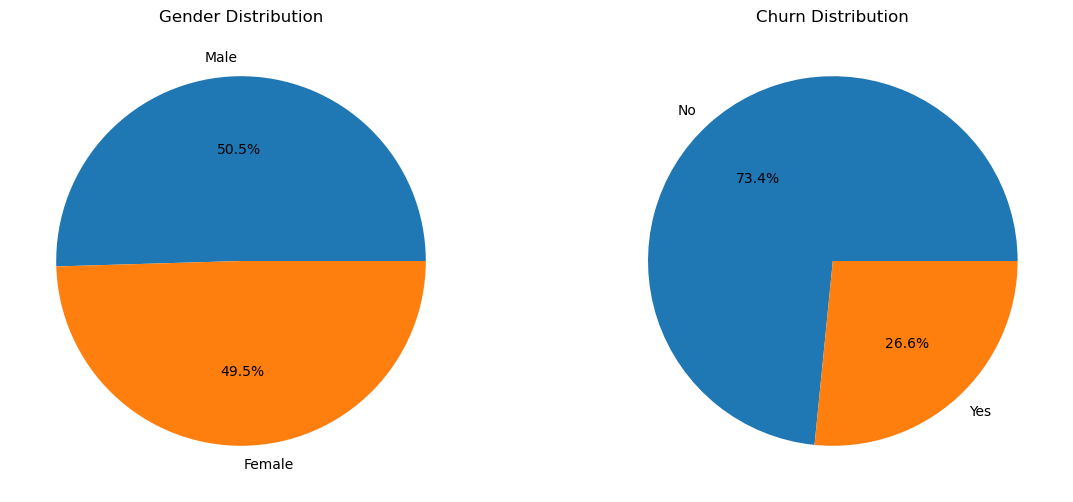

In [126]:
# Pie chart for gender
gender_counts = df['gender'].value_counts()
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.pie(gender_counts, labels=g_labels, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.gca().set_aspect("equal")

# Pie chart for churn
churn_counts = df['Churn'].value_counts()
plt.subplot(1,2,2)
plt.pie(churn_counts, labels=c_labels, autopct='%1.1f%%')
plt.title('Churn Distribution')
plt.gca().set_aspect("equal")

plt.show()

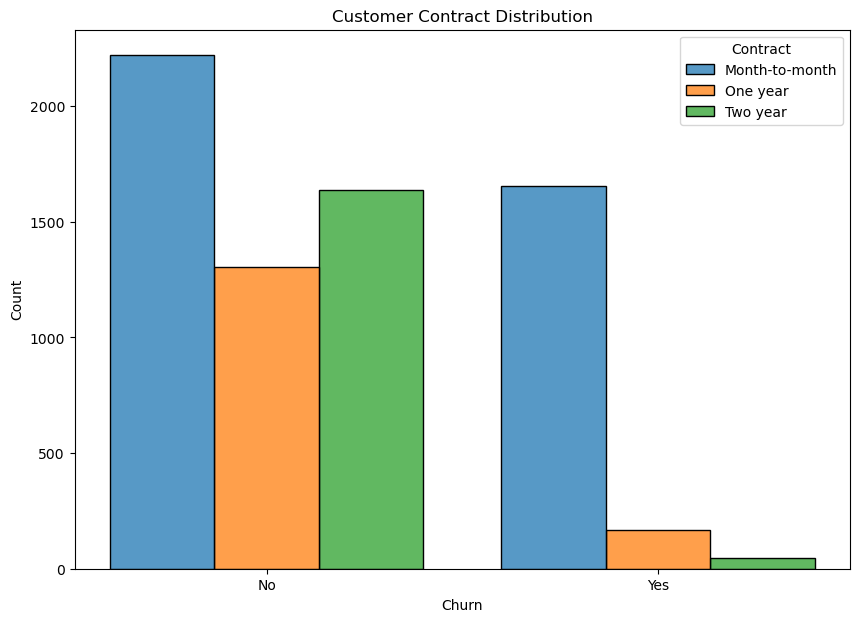

In [127]:
# Contract feature histogram
plt.figure(figsize=(10,7))

sns.histplot(data=df, x="Churn", hue="Contract", multiple="dodge", shrink=.8)

plt.title('Customer Contract Distribution')

plt.show()

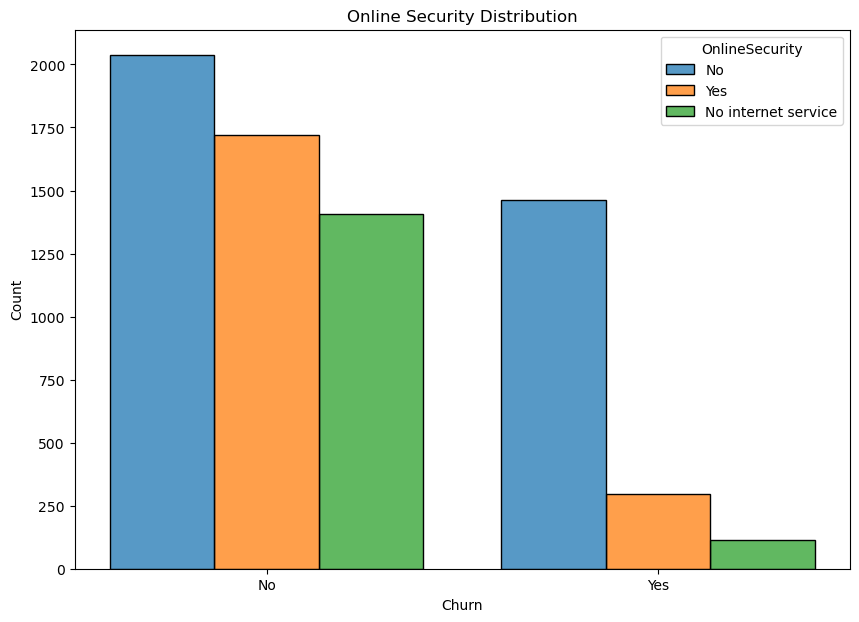

In [128]:
# OnlineSecurity feature histogram
plt.figure(figsize=(10,7))

sns.histplot(data=df, x="Churn", hue="OnlineSecurity", multiple="dodge", shrink=.8)

plt.title('Online Security Distribution')

plt.show()

In [129]:
# Group the data by 'Churn' and 'OnlineSecurity' and count the number of entries in each group
grouped = df.groupby(['Churn', 'OnlineSecurity']).size()

# Calculate the percentage of churned customers who had no online security
no_online_security_churned = grouped['Yes', 'No'] / grouped['Yes'].sum() * 100

print(f"Percentage of churned customers who had no online security: {no_online_security_churned}%")


Percentage of churned customers who had no online security: 78.1701444622793%


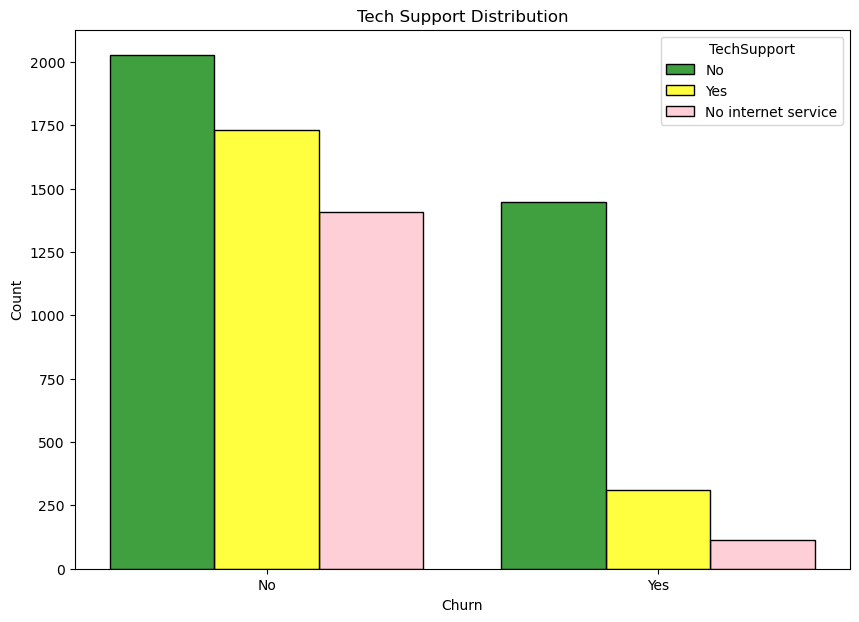

In [130]:
# TechSupport feature histogram
plt.figure(figsize=(10,7))

sns.histplot(data=df, x="Churn", hue="TechSupport", multiple="dodge", shrink=.8, palette=['green', 'yellow', 'pink'])

plt.title('Tech Support Distribution')

plt.show()


In [131]:
# Count of customers who churned and didn't have tech support
churn_no_tech_support = df[(df["Churn"] == "Yes") & (df["TechSupport"] == "No")].shape[0]

# Count of all customers who churned
total_churned = df[df["Churn"] == "Yes"].shape[0]

# Percentage of customers who churned and didn't have tech support
percentage_no_tech_support = (churn_no_tech_support / total_churned) * 100
print("Percentage of churned customers who had no tech support:", percentage_no_tech_support, "%")


Percentage of churned customers who had no tech support: 77.36757624398074 %


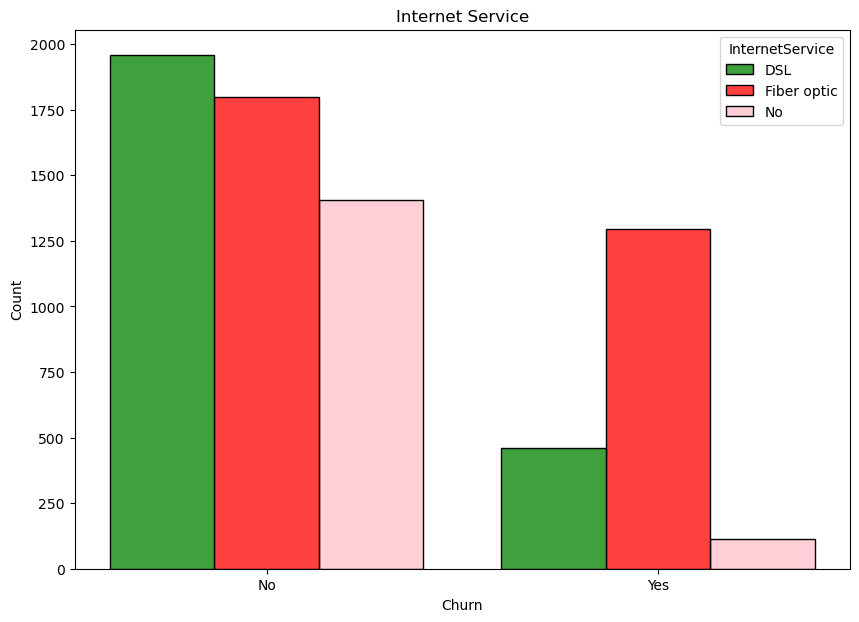

In [132]:
# InternetService feature histogram
plt.figure(figsize=(10,7))

sns.histplot(data=df, x="Churn", hue="InternetService", multiple="dodge", shrink=.8, palette=['green', 'red', 'pink'])

plt.title('Internet Service')

plt.show()



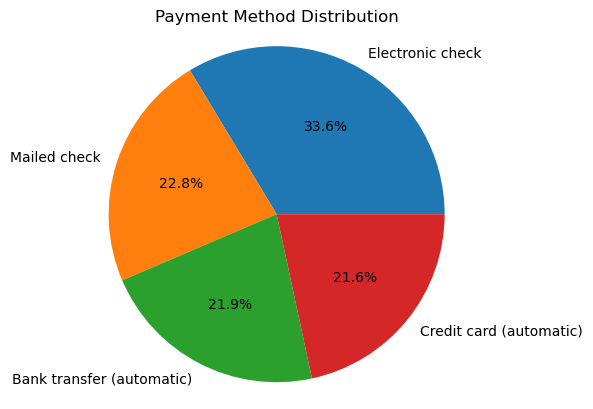

In [133]:
#Payment method distribution
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

# Create pie chart
fig, ax = plt.subplots()
ax.pie(values, labels = labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Payment Method Distribution")


plt.show()

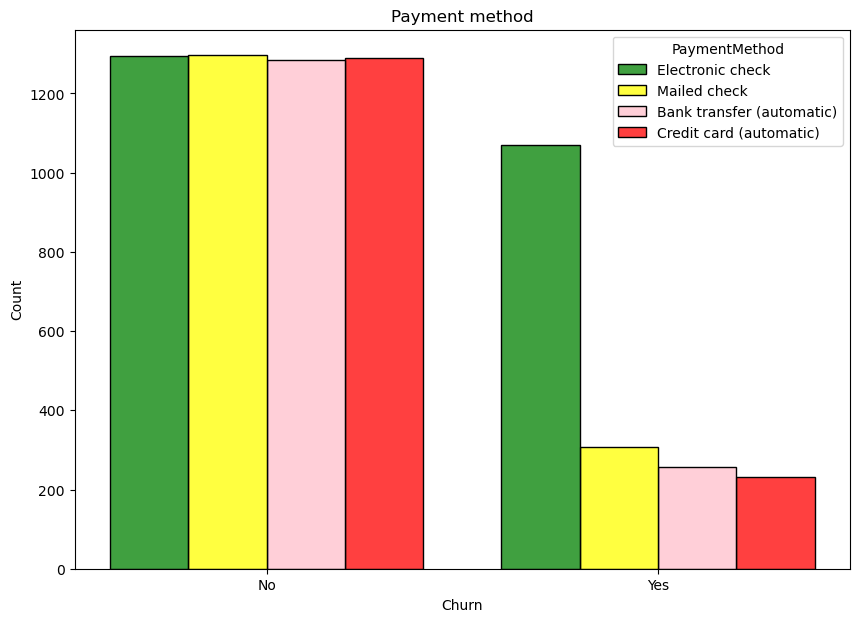

In [134]:
# PaymentMethod feature histogram
colors = ['green', 'yellow', 'pink', 'red']
color_map = dict(zip(df["PaymentMethod"].unique(), colors))

# Create the plot
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="Churn", hue="PaymentMethod", multiple="dodge", shrink=.8, palette=color_map)

plt.title('Payment method')

plt.show()


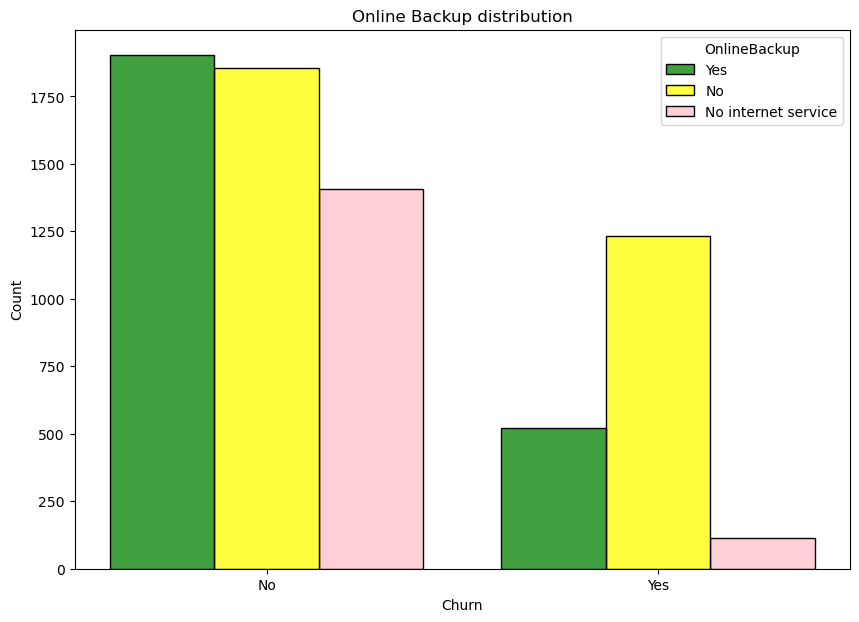

In [135]:
# OnlineBackup feature histogram
colors = ['green', 'yellow', 'pink']
color_map = dict(zip(df["OnlineBackup"].unique(), colors))

# Create the plot
plt.figure(figsize=(10,7))
sns.histplot(data=df, x="Churn", hue="OnlineBackup", multiple="dodge", shrink=.8, palette=color_map)

plt.title('Online Backup distribution')

plt.show()


In [136]:
# Calculate the percentage of churned customers who had no OnlineBackup
no_online_backup_churned = df[(df["Churn"] == "Yes") & (df["OnlineBackup"] == "No")].shape[0]
total_churned = df[df["Churn"] == "Yes"].shape[0]

percentage_no_online_backup_churned = (no_online_backup_churned / total_churned) * 100
print(f"Percentage of churned customers who had no OnlineBackup: {percentage_no_online_backup_churned}%")


Percentage of churned customers who had no OnlineBackup: 65.97110754414125%


## Data Manipulation

In [137]:
# Convert categorical data to numeric

le = LabelEncoder()

# Make a copy of the dataframe df_dummies into df3
df3 = df_dummies.copy()

# Loop over the columns and transform categorical columns
for col in df3.columns:
    if df3[col].dtype=='object':
        df3[col] = le.fit_transform(df3[col])

# Display the first few rows of the new dataset
df3.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0


In [138]:
#Check for null values
df3.isnull().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_No                           0
SeniorCitizen_Yes                          0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

## Machine Learning 

In [139]:
# Define the features and target variables
X = df3.drop(columns = ['Churn'])
y = df3['Churn'].values

In [140]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

In [141]:
# RandomForest
model_rf = RandomForestClassifier(n_estimators=500 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
# Fit the model to the training data
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

# Accuracy of the model
print (metrics.accuracy_score(y_test, prediction_test))

0.8099526066350711


<Axes: >

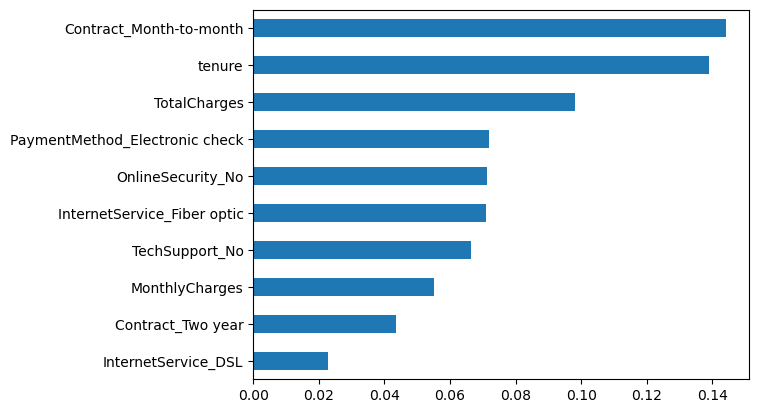

In [142]:
# Show the feature's importances
importances = model_rf.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
# Last 10 items ([-10:]) represent the top 10 features with the highest importance.
# These features have the greatest positive impact on the churn rate prediction. 
weights.sort_values()[-10:].plot(kind = 'barh')

In [143]:
# Running logistic regression model

model = LogisticRegression()

# Fit the model to the training data
result = model.fit(X_train, y_train)

prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8123222748815165


Axes(0.125,0.11;0.775x0.77)


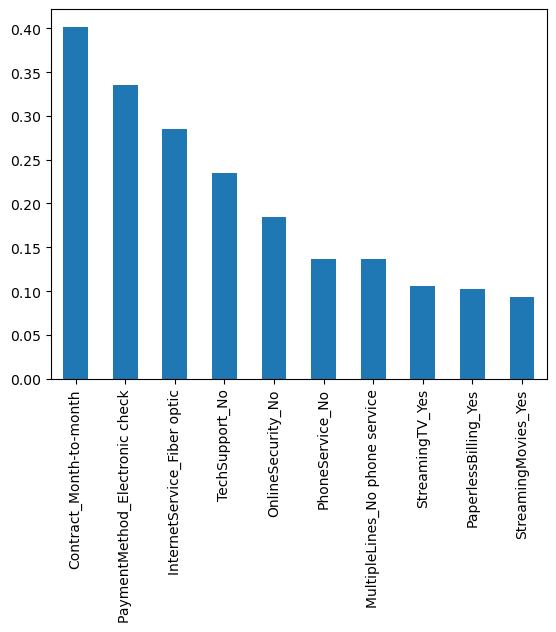

In [144]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
# First 10 items ([:10]) represent the top 10 features with the highest positive coefficients.
# These features have the greatest positive impact on the churn prediction.
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

Axes(0.125,0.11;0.775x0.77)


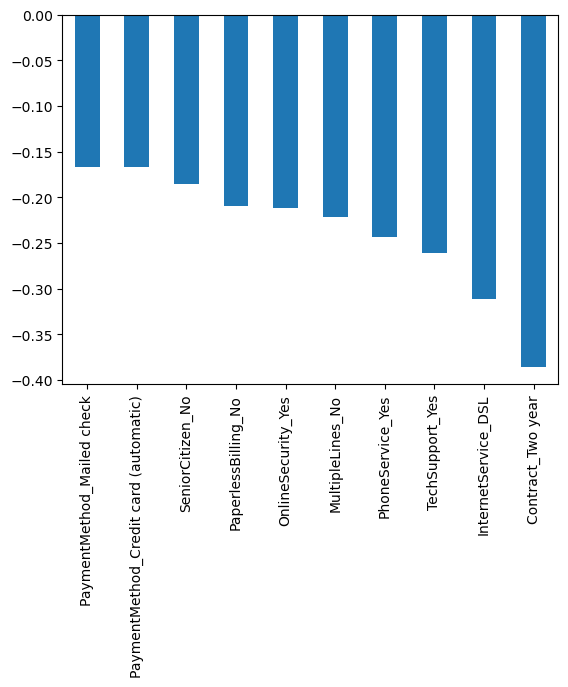

In [145]:
# Last 10 items ([-10:]) represent the top 10 features with the lowest (most negative) coefficients.
# These features have the greatest negative impact on the churn prediction(decrease churn rate).
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [146]:
#Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training data.
dt_model.fit(X_train,y_train)

# Use the trained model to predict the target variable (churn) in the test dataset
predictdt_y = dt_model.predict(X_test)

# Accuracy score of the Decision Tree model
accuracy_dt = dt_model.score(X_test,y_test)
print("Decision Tree accuracy is :",accuracy_dt)

Decision Tree accuracy is : 0.7308056872037915


In [147]:
print(classification_report(y_test, predictdt_y))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1549
           1       0.49      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



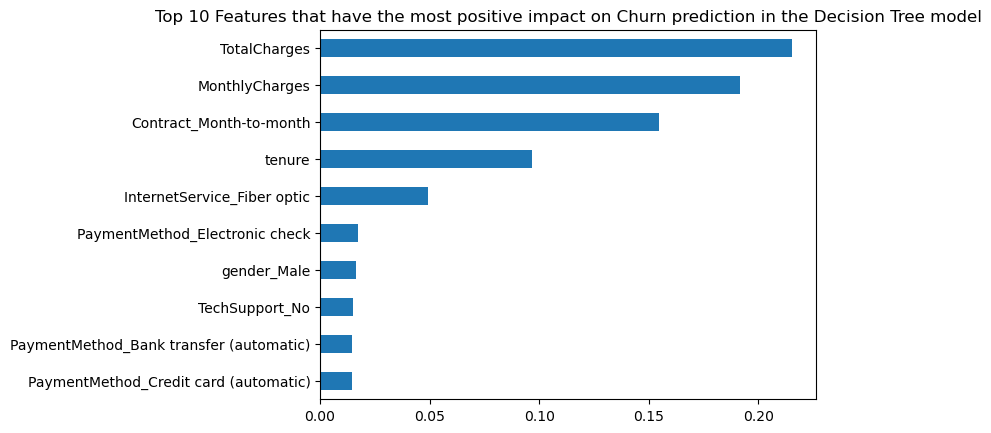

In [148]:
# Get the feature importances
importances_dt = dt_model.feature_importances_

# Create a pandas series with the feature importances
weights_dt = pd.Series(importances_dt, index=X.columns.values)

# Plot the 10 features with the highest feature importance
weights_dt.sort_values()[-10:].plot(kind = 'barh')
plt.title("Top 10 Features that have the most positive impact on Churn prediction in the Decision Tree model")
plt.show()